In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import interpolate
from scipy import integrate
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import sqrt
from math import pi
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
from scipy import optimize
from labellines import labelLine, labelLines
import csv

### This notebook plots $\xi_{\mathrm{max}}$ vs $\gamma_0$ for both space and time dependent cases.

In [2]:
#Import show() function for plotting 
%run C:\Users\wbenn/Marshak_Wave_Scripts/Marshak_3T/SelfSimilar_main/show.ipynb
#Import initial conditions
%run C:\Users\wbenn/Marshak_Wave_Scripts/Marshak_3T/SelfSimilar_main/initial_conditions.ipynb

In [3]:
#Define Constants
n = 3
m=0
T0=1
c=29.9792458
a=0.01372
kappa0=300
xmax=1.2
rho = 3.0
Cve=0.1*rho
Cvi=.05*rho
alpha= a*c*4/(3*(n+4)*kappa0*Cve*(T0**n))
A = sqrt(1/(2*alpha))
tol = 1e-12
cmap = plt.get_cmap("tab10")
ICt = [g(xmax-tol,xmax),gprime(xmax-tol,xmax), h(xmax-tol,xmax)]
ICs = [g(xmax-tol,xmax),gprime(xmax-tol,xmax), f(xmax-tol,xmax)]
step = 1e-2

In [4]:
# List of gamma0 values to be tested 
gamma0_list=[0,.0001,.0005,.001,.002,.003,.004,.005,.01,.03,.05,0.1,0.2,0.3,.5,1,3,5,10,50,75,100,300,400,500,1000,1500,10000,1e5]

In [5]:
#Time dependent optimization functions
#using BDF to solve time dependent
opt_fun_BDF_time = lambda xm: integrate.solve_ivp(RHSfun_time, (xm-tol,1e-10), [g(xm-tol,xm),gprime(xm-tol,xm), h(xm-tol,xm)], 
                                         method='BDF', max_step = step).y[0][-1] - 1
#Using DOP853 to solve time dependent
opt_fun_DOP_time = lambda xm: integrate.solve_ivp(RHSfun_time, (xm-tol,0), [g(xm-tol,xm),gprime(xm-tol,xm), h(xm-tol,xm)], 
                                         method='DOP853', max_step = step).y[0][-1] - 1
#Space dependent(BDF)
opt_fun_BDF_space = lambda xm: integrate.solve_ivp(RHSfun_space, (xm-tol,1e-10), [g(xm-tol,xm),gprime(xm-tol,xm), f(xm-tol,xm)], 
                                         method='BDF', max_step = step).y[0][-1] - 1

In [6]:
#Calculate ximax for m=3/2 for time and space dependent-This takes a while
m=3/2
minval_list_time_m32=[]
minval_list_space_m32 =[]

for gamma0 in gamma0_list:
    #time dependent
    minval1 = optimize.brentq(opt_fun_BDF_time, .8,1.2)
    minval_list_time_m32.append(minval1)
    #space dependent
    minval2  = optimize.brentq(opt_fun_BDF_space, .8,1.2)
    minval_list_space_m32.append(minval2)

C:\Users\wbenn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


In [7]:
#Calculate ximax for m=0 for time and space dependentm=0
m=0
minval_list_time_m0=[]
minval_list_space_m0 =[]
for gamma0 in gamma0_list:
    minval1 = optimize.brentq(opt_fun_BDF_time, .8,1.2)
    minval_list_time_m0.append(minval1)
    #space solution
    minval2  = optimize.brentq(opt_fun_BDF_space, .8,1.2)
    minval_list_space_m0.append(minval2)

### Plots

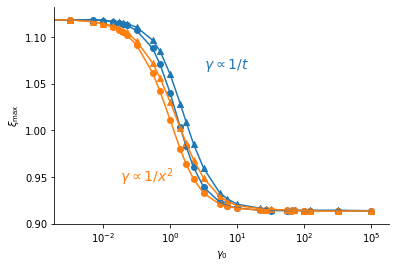

In [14]:
#Plots of ximax vs gamma0, m =3/2
fig1, ax1 = plt.subplots()
#time
ax1.plot(gamma0_list,minval_list_time_m32,label ="Time Dependent")
ax1.scatter(gamma0_list,minval_list_time_m32)

#space
ax1.plot(gamma0_list,minval_list_space_m32, label = "Space Dependent")
ax1.scatter(gamma0_list,minval_list_space_m32)

plt.ylabel(r"$\xi_{\mathrm{max}}$",fontsize=10)
plt.xlabel(r"$\gamma_0$", fontsize=10)

#this block is for resolving issues that the show() function has with logscale plots
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.set_xscale('log')
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.text(7**(-2),.95,r'$\gamma \propto 1/x^2$',horizontalalignment='center', verticalalignment='center',rotation=0,fontsize = 14,c=cmap(1))
ax1.text(5,1.07,r'$\gamma \propto 1/t$',horizontalalignment='center', verticalalignment='center',rotation=0,fontsize = 14,c=cmap(0))
ax1.plot(gamma0_list,minval_list_time_m0,label ="Time Dependent",c=cmap(0))
ax1.scatter(gamma0_list,minval_list_time_m0,marker="^", color=cmap(0))
ax1.scatter(gamma0_list,minval_list_space_m0, label = "Space Dependent",marker="^",color=cmap(1))
ax1.plot(gamma0_list,minval_list_space_m0, label = "Space Dependent",c=cmap(1))
plt.ylabel(r"$\xi_{\mathrm{max}}$",fontsize=10)
plt.xlabel(r"$\gamma_0$", fontsize=10)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.set_xscale('log')
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
show("gamma0vsximax")
plt.show()


### m=0 -- triangles, m=3/2 -- circles